## **Inspect Model(s)**

### **Imports**

In [28]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

In [29]:
%load_ext autoreload
%autoreload 2
import bep_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Configurations**

In [30]:
import tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

### **Load data**

In [31]:
bep_utils.check_dir_setup(ROOT_DIR, 0.7)

_, bep_val = bep_utils.load_train_val_datasets(ROOT_DIR)
_, or_val = bep_utils.load_train_val_datasets_tdmms(ROOT_DIR, 'MoS2')

print("BEP NbSe2 validation images: {} | Classes: {}".format(len(bep_val.image_ids),bep_val.class_names))
print("Original MoS2 validation images: {} | Classes: {}".format(len(or_val.image_ids),or_val.class_names))

Directory setup correctly
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
BEP NbSe2 validation images: 6 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
Original MoS2 validation images: 110 | Classes: ['BG', 'Mono_MoS2', 'Few_MoS2', 'Thick_MoS2']


### **Load Model(s)**

In [32]:
TDM_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', 'mos2_mask_rcnn_tdm_0120.h5')
model_MoS2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='MoS2 Trained Model')
print("MoS2 Model, loading weights {}".format(TDM_MODEL_PATH))
model_MoS2.load_weights(TDM_MODEL_PATH, by_name=True)

BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'saved_weights', 'tdm20241016T2359', 'mask_rcnn_tdm_0111.h5')
model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

MoS2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\weights\mos2_mask_rcnn_tdm_0120.h5
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\saved_weights\tdm20241016T2359\mask_rcnn_tdm_0111.h5
Re-starting from epoch 111


### **Run Model**

**MoS2 Model on MoS2**

image ID: coco.cjygpkwpnqswc09446f6ylj5t (8) http://cocodataset.org/#explore?id=cjygpkwpnqswc09446f6ylj5t
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  487.00000  max:  510.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


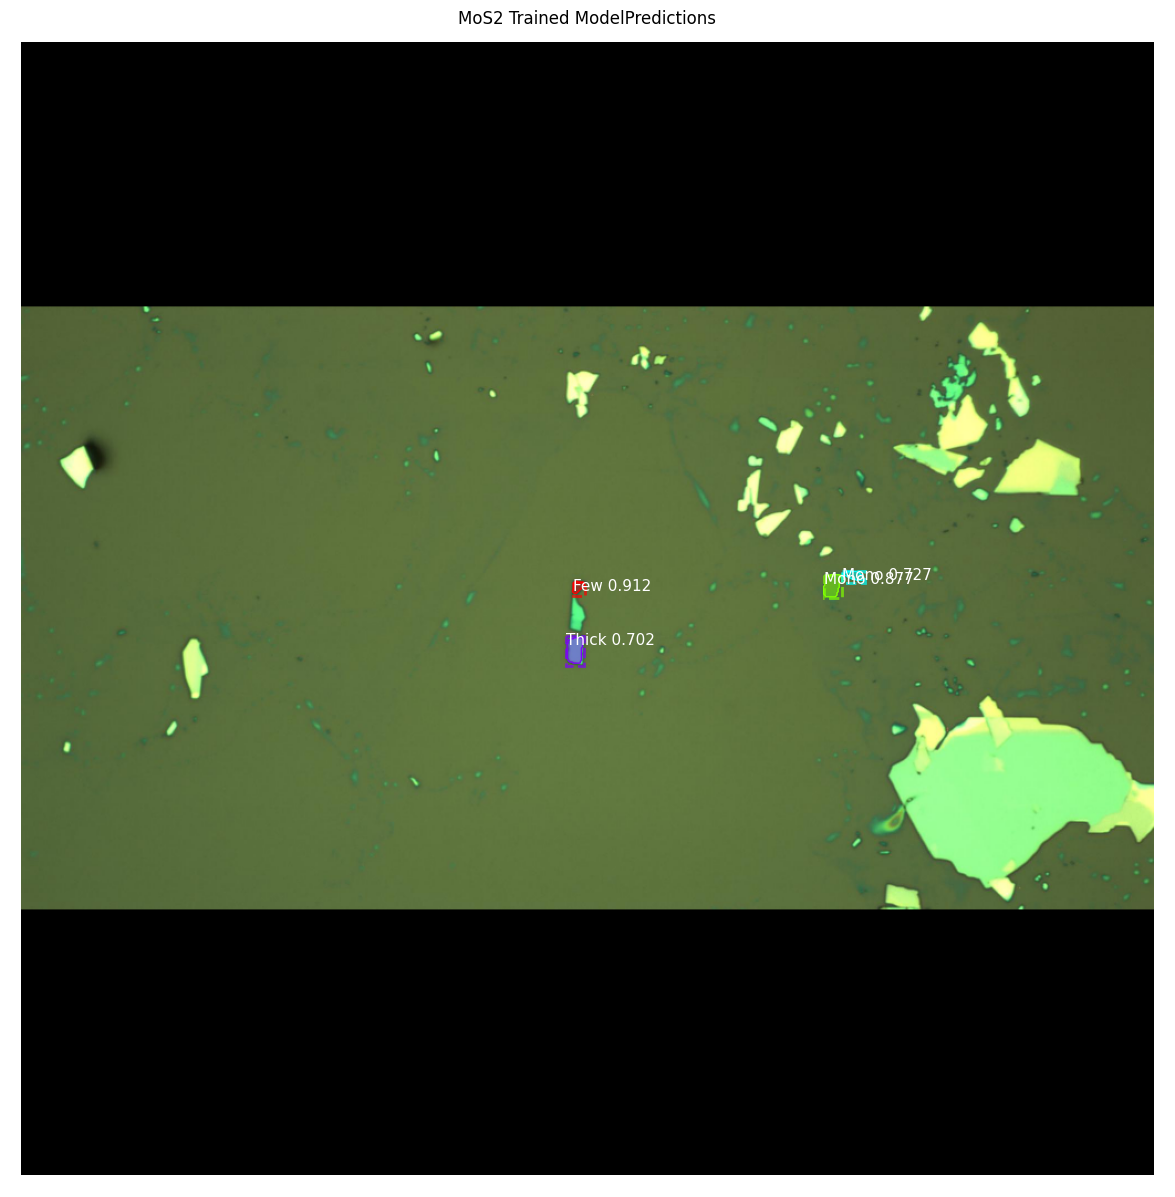

In [33]:
run_MoS2 = bep_utils.runModel(model_MoS2, config)
run_MoS2.run(image_idx=8, dataset=or_val)

image_id:  8 http://cocodataset.org/#explore?id=cjygpkwpnqswc09446f6ylj5t
Original shape:  (1086, 2040, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    2.00000  max:    2.00000  int32
[2]
bbox                     shape: (1, 4)                min:  487.00000  max:  510.00000  int32


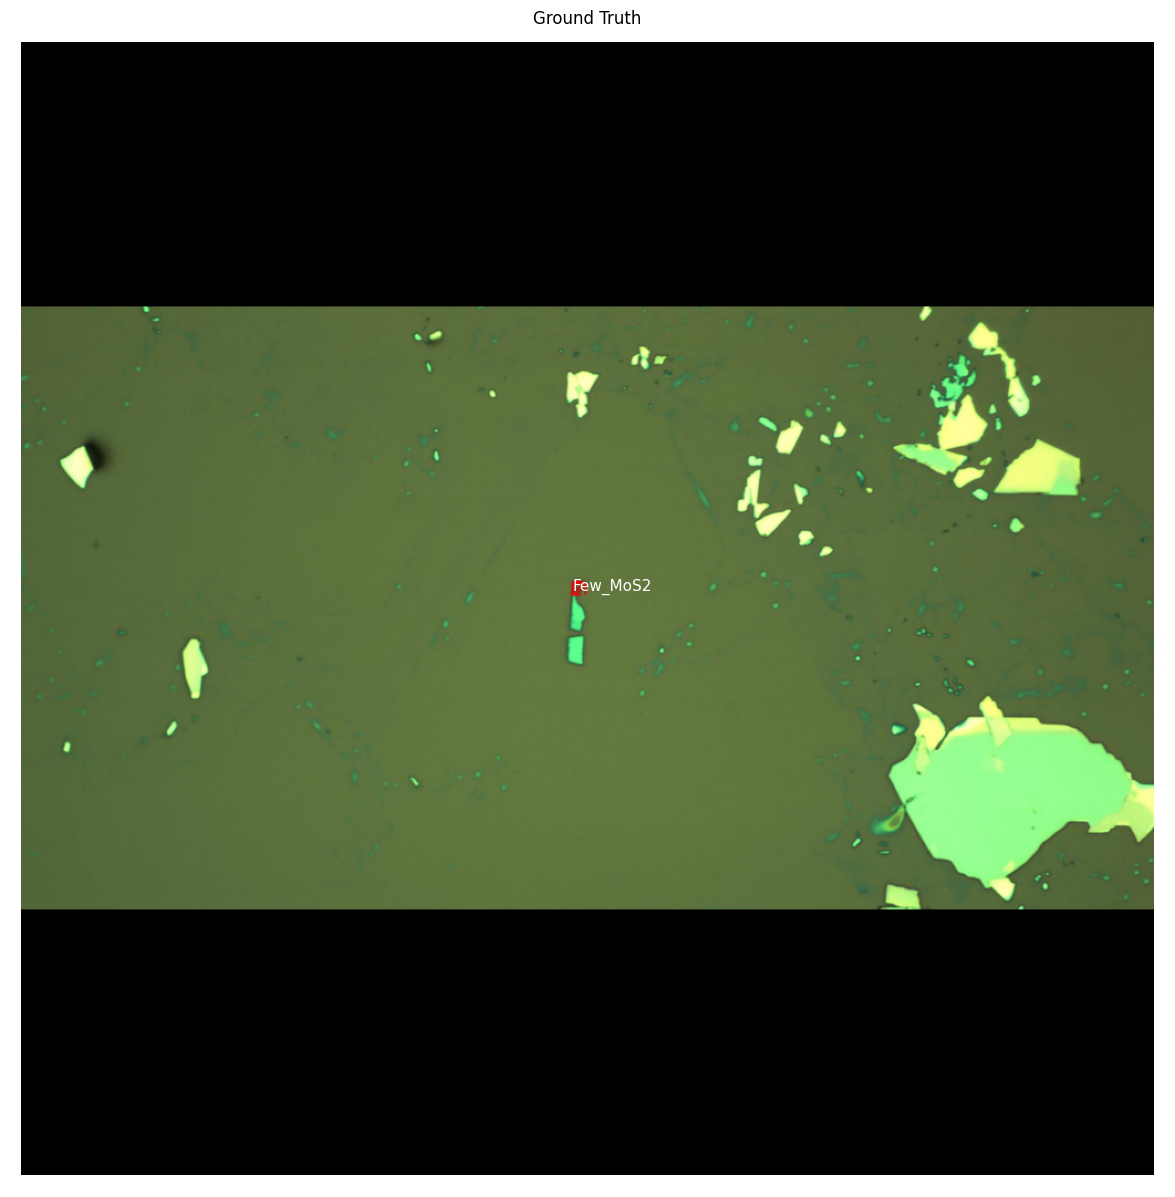

In [34]:
run_MoS2.gt()

**Run MoS2 Model on NbSe2**

image ID: ali.3 (2) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  122.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 

gt_class_id              shape: (1,)                  min:    3.00000  max:    3.00000  int32
gt_bbox                  shape: (1, 4)                min:  422.00000  max:  489.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


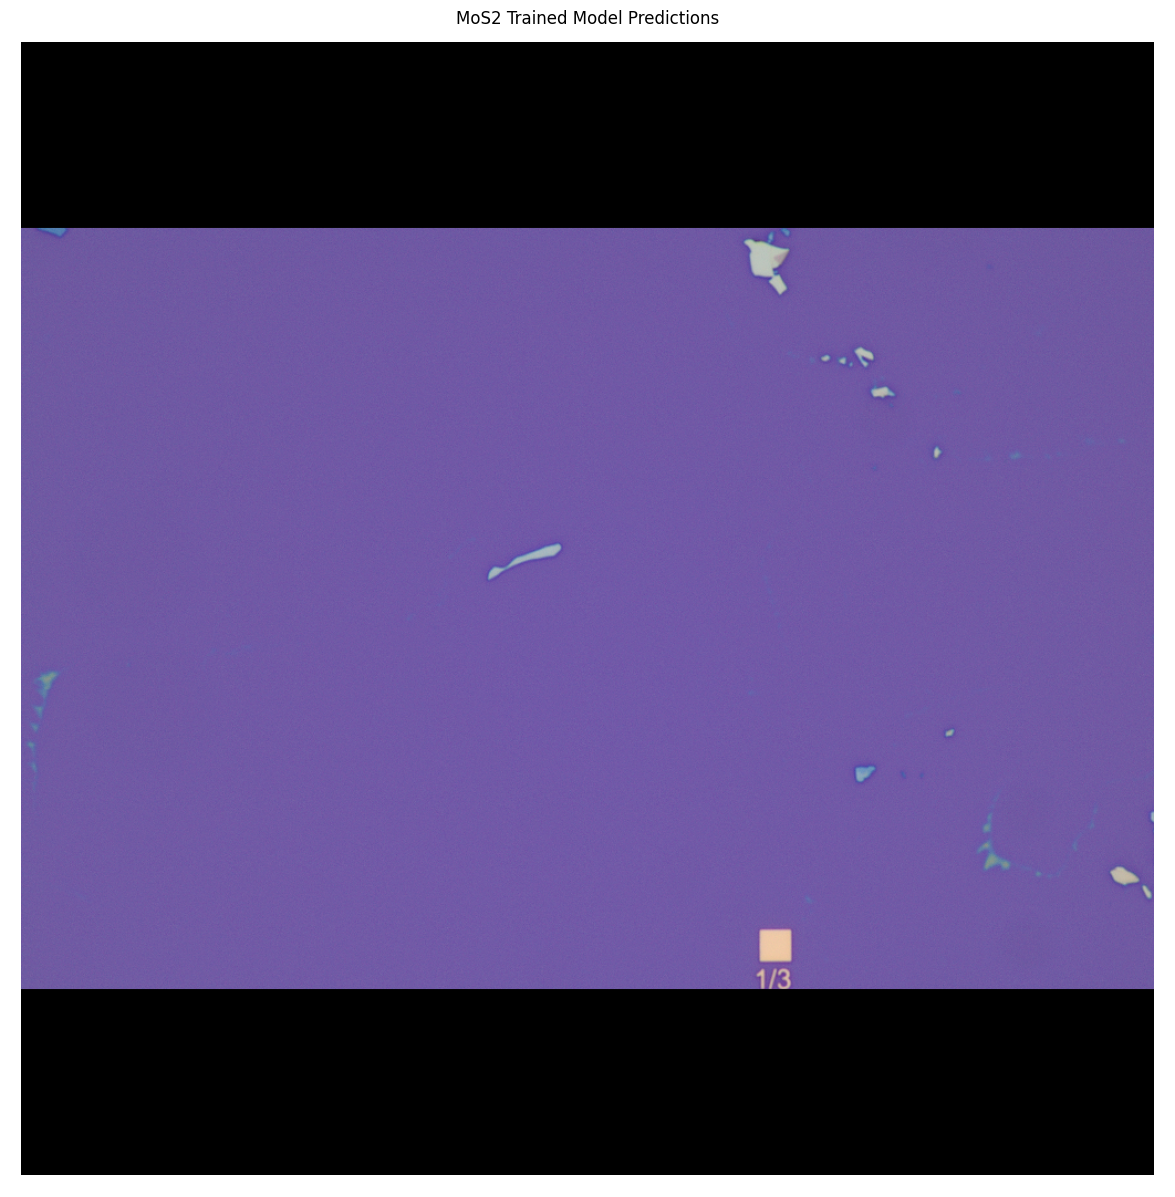

In [39]:
run_MoS2.run(image_idx=2, dataset=bep_val)

image_id:  2 
Original shape:  (2076, 3088, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    3.00000  max:    3.00000  int32
[3]
bbox                     shape: (1, 4)                min:  422.00000  max:  489.00000  int32


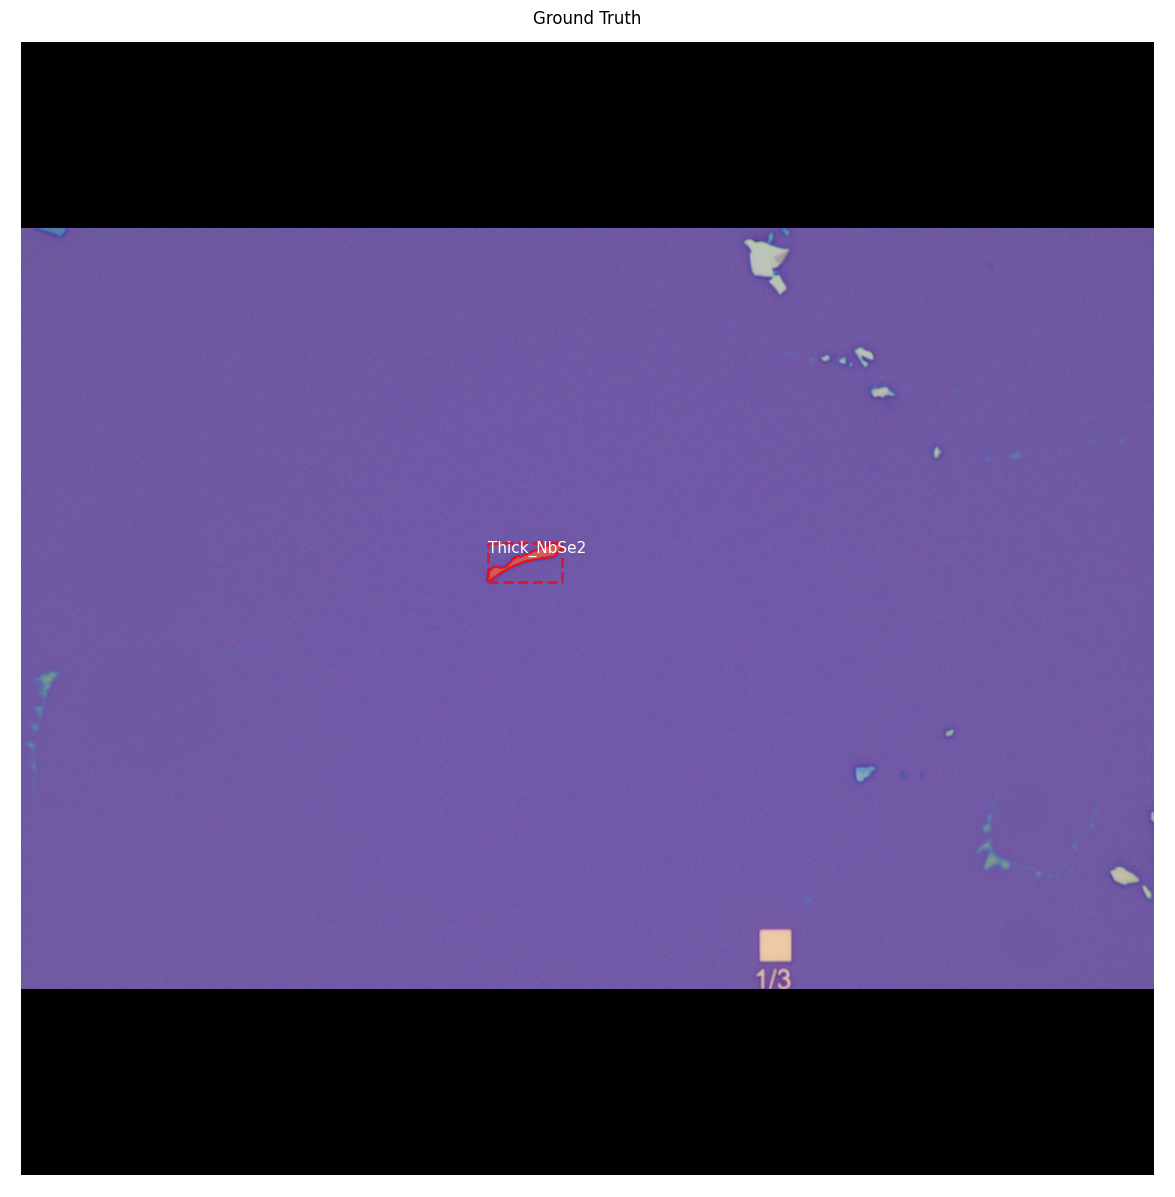

In [40]:
run_MoS2.gt()

**Run NbSe2 Model on NbSe2**

image ID: ali.3 (2) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  122.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    3.00000  max:    3.00000  int32
gt_bbox                  shape: (1, 4)                min:  422.00000  max:  489.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


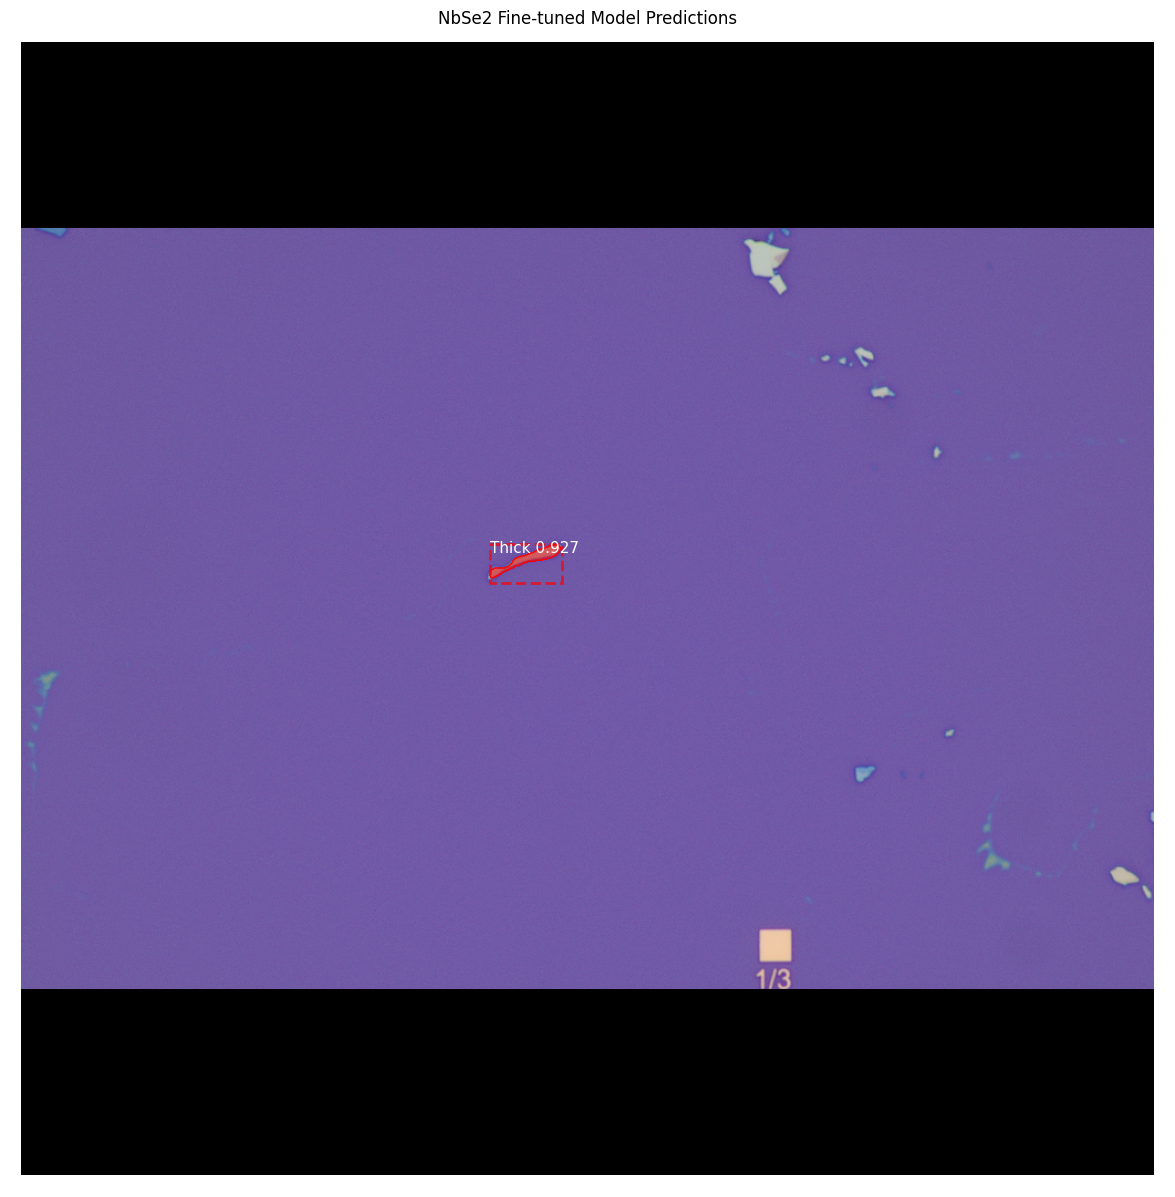

In [41]:
run_NbSe2 = bep_utils.runModel(model_NbSe2, config)
run_NbSe2.run(image_idx=2, dataset=bep_val)

image_id:  2 
Original shape:  (2076, 3088, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    3.00000  max:    3.00000  int32
[3]
bbox                     shape: (1, 4)                min:  422.00000  max:  489.00000  int32


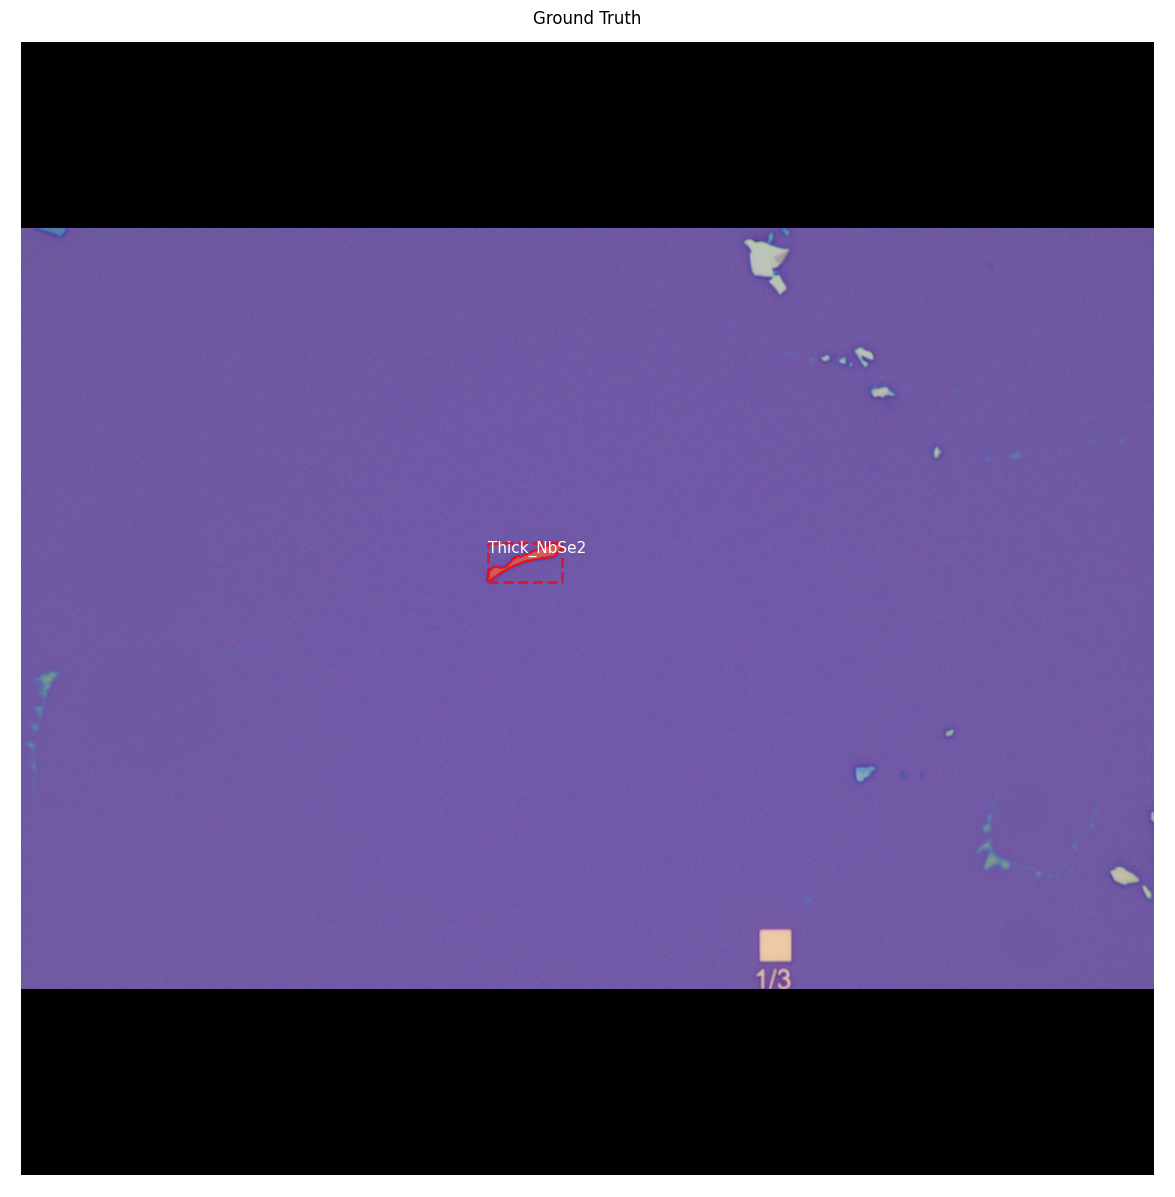

In [42]:
run_NbSe2.gt()